In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter   # count the number of instances of each class
import time      # time library to calculate the time taken


train = pd.read_csv('train_preprocessed.csv')
validation = pd.read_csv('validation_preprocessed.csv')
test = pd.read_csv('test_preprocessed.csv')


#spliting the train, validation and test data into features and target variable(Default)
X_train = train.drop(['Default'], axis=1)
Y_train = train['Default']

X_validation = validation.drop(['Default'], axis=1)
Y_validation = validation['Default']

X_test = test.drop(['Default'], axis=1)
Y_test = test['Default']

In [26]:
#train the model(s)

# import models' libraries from here
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


# insert the models that you want to use in the list using this format:  models.append(('model name', Model()))
models = []   #(   __name__   ,    __Model()__  )     # you can comment(hashtag) the models below that you don't want to use
models.append(('GaussianNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=51)))
models.append(('RandomForest', RandomForestClassifier(n_estimators=200, random_state=42)))
models.append(('DecisionTree', DecisionTreeClassifier(criterion='entropy', random_state=42)))
models.append(('LogisticRegression', LogisticRegression(random_state=42)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(26,26,26,1), max_iter=200, random_state=42)))




In [27]:
# %%script echo skipping
# train the model using training and validation data

for name, model in models:
    try:
        startTraining = time.time()   # start Training time
        model.fit(X_train, Y_train)
        endTraining = time.time()     # end Training time
        print(name, 'trained,', 'Time taken:', \
            time.strftime("%H:%M:%S  ", time.gmtime(endTraining - startTraining)))
        #reset the time for next model
        startTraining = endTraining = 0
    except Exception as e:
        print("Input error:", e)


GaussianNB trained, Time taken: 00:00:00  
KNN trained, Time taken: 00:00:00  
RandomForest trained, Time taken: 00:02:46  
DecisionTree trained, Time taken: 00:00:06  
LogisticRegression trained, Time taken: 00:00:00  
MLP trained, Time taken: 00:03:02  


In [28]:

# y_pred to store the predicted values from each model
# y_pred_proba to store probabilities from each model
y_pred = []                 #for confusion matrix
y_pred_proba = []           #for ROC curve
for name, model in models:
    try:
        startPredicting = time.time()   # start predicting time
        y_pred.append(model.predict(X_validation))
        y_pred_proba.append(model.predict_proba(X_validation))
        endPredicting = time.time()     # end predicting time
        print(name, 'predicted,', 'Time taken:', \
              time.strftime("%H:%M:%S  ", time.gmtime(endPredicting - startPredicting)))
        #reset the time for next model
        startPredicting = endPredicting = 0
    except Exception as e:
        print("Input error:", e)



GaussianNB predicted, Time taken: 00:00:00  
KNN predicted, Time taken: 00:00:40  
RandomForest predicted, Time taken: 00:00:04  
DecisionTree predicted, Time taken: 00:00:00  
LogisticRegression predicted, Time taken: 00:00:00  
MLP predicted, Time taken: 00:00:00  


GaussianNB
Accuracy:  0.7447175168902379
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     45145
           1       0.23      0.52      0.32      5920

    accuracy                           0.74     51065
   macro avg       0.58      0.65      0.58     51065
weighted avg       0.85      0.74      0.78     51065

[[34926 10219]
 [ 2817  3103]]


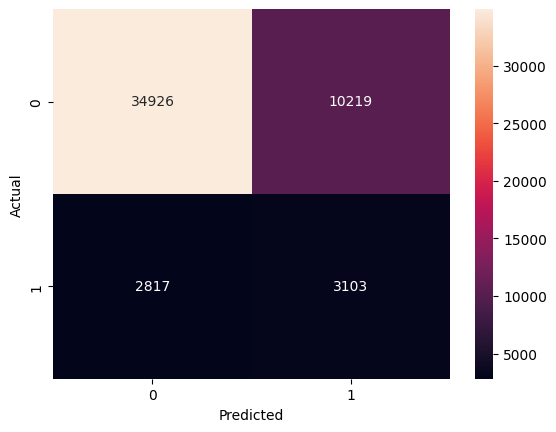

KNN
Accuracy:  0.6191324782140409
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     45145
           1       0.19      0.71      0.30      5920

    accuracy                           0.62     51065
   macro avg       0.57      0.66      0.52     51065
weighted avg       0.85      0.62      0.69     51065

[[27407 17738]
 [ 1711  4209]]


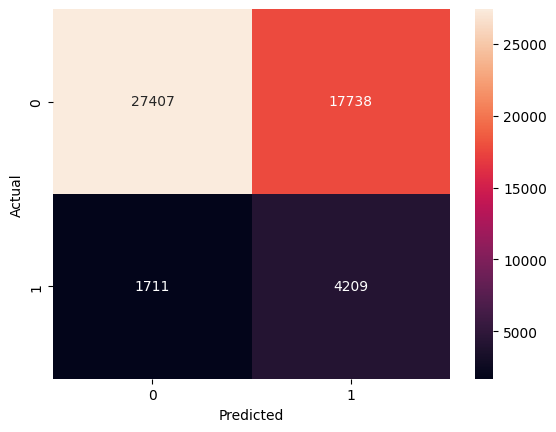

RandomForest
Accuracy:  0.7943405463624792
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     45145
           1       0.25      0.39      0.31      5920

    accuracy                           0.79     51065
   macro avg       0.58      0.62      0.59     51065
weighted avg       0.84      0.79      0.81     51065

[[38230  6915]
 [ 3587  2333]]


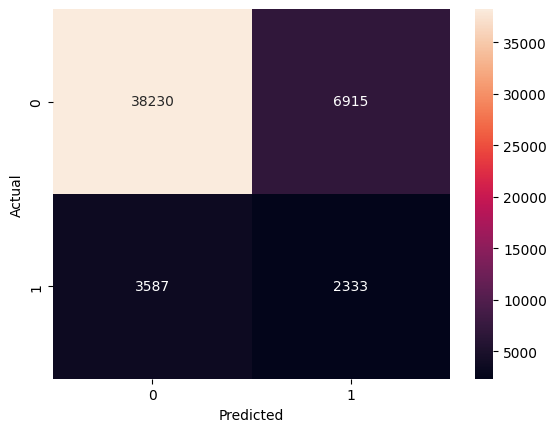

DecisionTree
Accuracy:  0.6461764417898757
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     45145
           1       0.16      0.48      0.24      5920

    accuracy                           0.65     51065
   macro avg       0.53      0.58      0.50     51065
weighted avg       0.82      0.65      0.71     51065

[[30141 15004]
 [ 3064  2856]]


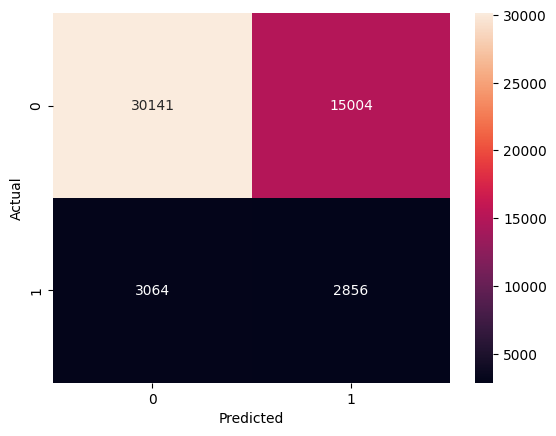

LogisticRegression
Accuracy:  0.8352100264368941
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     45145
           1       0.31      0.34      0.32      5920

    accuracy                           0.84     51065
   macro avg       0.61      0.62      0.61     51065
weighted avg       0.84      0.84      0.84     51065

[[40652  4493]
 [ 3922  1998]]


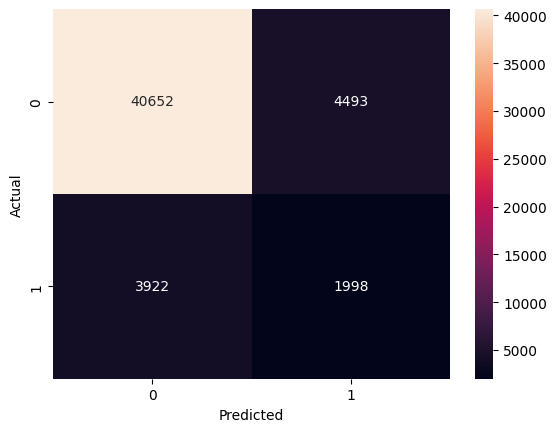

MLP
Accuracy:  0.8153921472632919
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     45145
           1       0.27      0.35      0.30      5920

    accuracy                           0.82     51065
   macro avg       0.59      0.61      0.60     51065
weighted avg       0.84      0.82      0.83     51065

[[39574  5571]
 [ 3856  2064]]


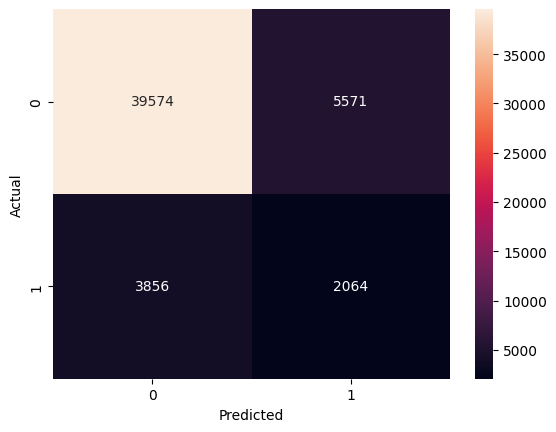

GaussianNB 		Accuracy:  0.7447175168902379 		AUC: 0.7168773928153427
KNN 		Accuracy:  0.6191324782140409 		AUC: 0.7152545757214741
RandomForest 		Accuracy:  0.7943405463624792 		AUC: 0.7087109797110211
DecisionTree 		Accuracy:  0.6461764417898757 		AUC: 0.5750405599973659
LogisticRegression 		Accuracy:  0.8352100264368941 		AUC: 0.733604522813876
MLP 		Accuracy:  0.8153921472632919 		AUC: 0.7113298403342982


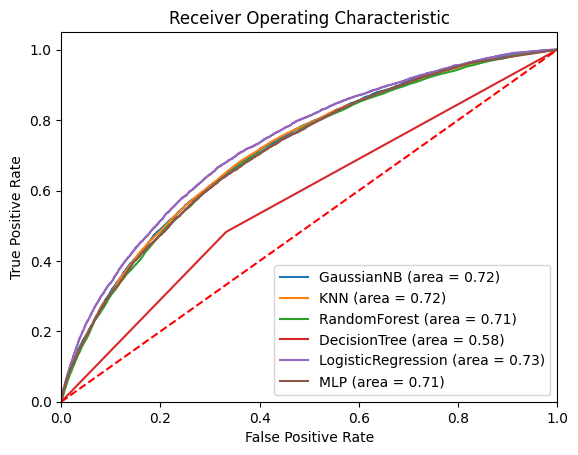

In [29]:
#%%script echo skipping

# print the accuracy, classification report and confusion matrix for each model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

accuracy = []
for i in range(len(models)):
    try:
        print(models[i][0])
        accuracy.append(accuracy_score(Y_validation, y_pred[i]))
        print('Accuracy: ', accuracy[i])
        print(classification_report(Y_validation, y_pred[i]))
        print(confusion_matrix(Y_validation, y_pred[i]))
        sns.heatmap(confusion_matrix(Y_validation, y_pred[i]), annot=True, fmt='d',)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    except Exception as e:
        print("Error:", e)
  
    
#auc score
from sklearn.metrics import roc_auc_score
for i in range(len(models)):
    print(models[i][0],'\t\tAccuracy: ', accuracy[i], '\t\tAUC:', roc_auc_score(Y_validation, y_pred_proba[i][:,1]))

from sklearn.metrics import auc
# plot ROC curve
fpr = []
tpr = []
roc_auc = []
for i in range(len(models)):
    try:
        fpr_, tpr_, threshold = roc_curve(Y_validation, y_pred_proba[i][:,1])
        fpr.append(fpr_)
        tpr.append(tpr_)
        roc_auc.append(auc(fpr_, tpr_))
        plt.plot(fpr[i], tpr[i], label=models[i][0] + ' (area = %0.2f)' % roc_auc[i])
    except Exception as e:
        print("Error:", e)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




GaussianNB predicted, Time taken: 00:00:00  
KNN predicted, Time taken: 00:00:44  
RandomForest predicted, Time taken: 00:00:04  
DecisionTree predicted, Time taken: 00:00:00  
LogisticRegression predicted, Time taken: 00:00:00  
MLP predicted, Time taken: 00:00:00  
GaussianNB
Accuracy:  0.7488152586848392
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     45126
           1       0.24      0.54      0.33      5940

    accuracy                           0.75     51066
   macro avg       0.58      0.66      0.59     51066
weighted avg       0.85      0.75      0.79     51066

[[35037 10089]
 [ 2738  3202]]


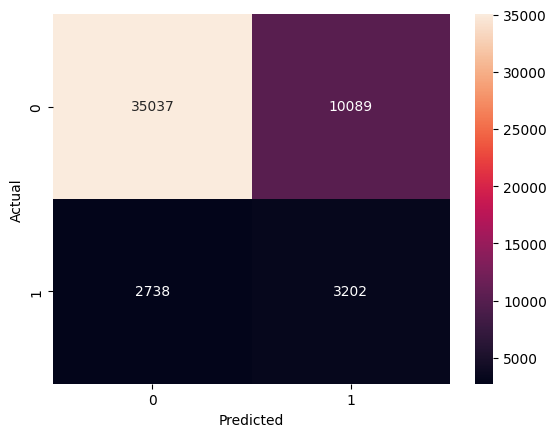

KNN
Accuracy:  0.6180824814945365
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     45126
           1       0.19      0.71      0.30      5940

    accuracy                           0.62     51066
   macro avg       0.57      0.66      0.52     51066
weighted avg       0.85      0.62      0.69     51066

[[27356 17770]
 [ 1733  4207]]


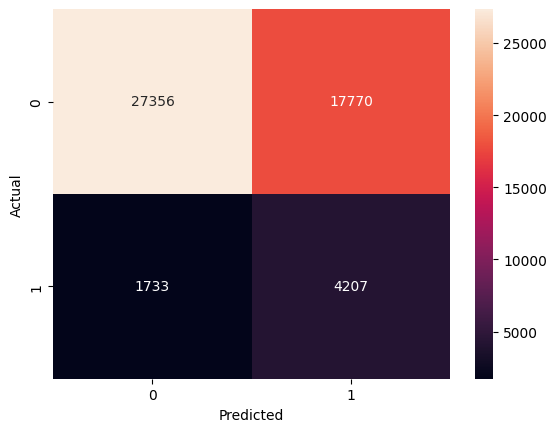

RandomForest
Accuracy:  0.785708690713978
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     45126
           1       0.25      0.43      0.32      5940

    accuracy                           0.79     51066
   macro avg       0.59      0.63      0.60     51066
weighted avg       0.84      0.79      0.81     51066

[[37560  7566]
 [ 3377  2563]]


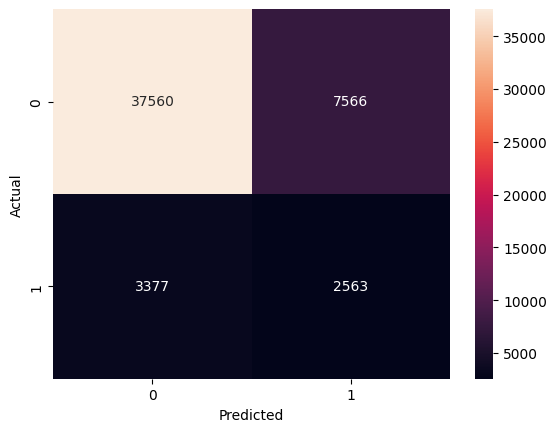

DecisionTree
Accuracy:  0.6046684682567658
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     45126
           1       0.15      0.53      0.24      5940

    accuracy                           0.60     51066
   macro avg       0.53      0.57      0.48     51066
weighted avg       0.82      0.60      0.68     51066

[[27748 17378]
 [ 2810  3130]]


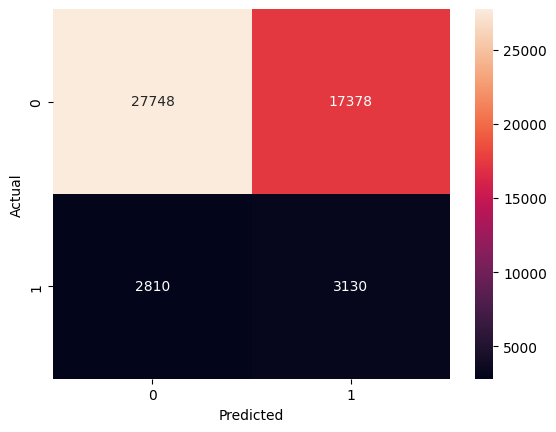

LogisticRegression
Accuracy:  0.8403830337210668
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45126
           1       0.33      0.35      0.34      5940

    accuracy                           0.84     51066
   macro avg       0.62      0.63      0.62     51066
weighted avg       0.84      0.84      0.84     51066

[[40855  4271]
 [ 3880  2060]]


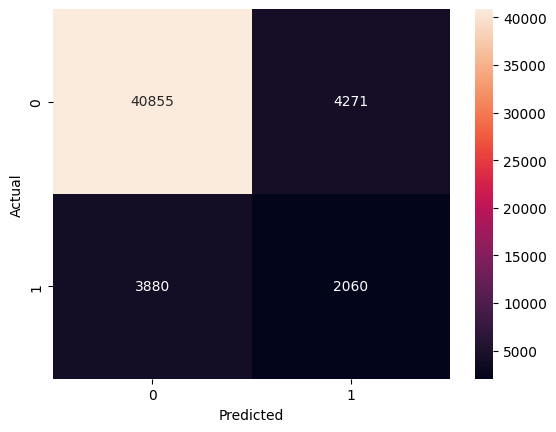

MLP
Accuracy:  0.8196255825794071
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     45126
           1       0.28      0.36      0.32      5940

    accuracy                           0.82     51066
   macro avg       0.60      0.62      0.61     51066
weighted avg       0.84      0.82      0.83     51066

[[39712  5414]
 [ 3797  2143]]


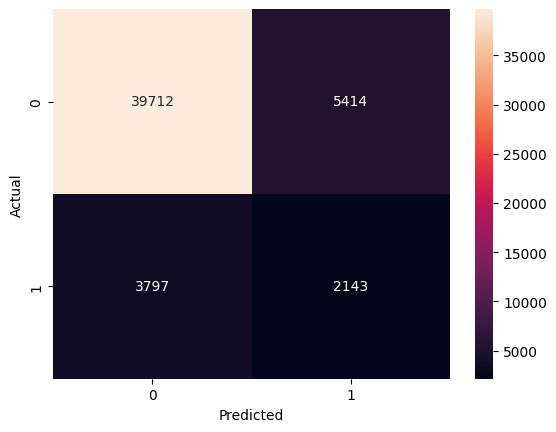

In [30]:
#%%script echo skipping
# use trained model on TEST data
import time      # time library to calculate the time taken

y_pred2 = []                 #for confusion matrix
y_pred_proba2 = []           #for ROC curve
for name, model in models:
    startPredicting2 = time.time()   # start predicting time
    y_pred2.append(model.predict(X_test))
    y_pred_proba2.append(model.predict_proba(X_test))
    endPredicting2 = time.time()     # end predicting time
    print(name, 'predicted,', 'Time taken:', \
          time.strftime("%H:%M:%S  ", time.gmtime(endPredicting2 - startPredicting2)))
    #reset time
    startPredicting2 = endPredicting2 = 0
    
    

# print the accuracy, classification report and confusion matrix for each model
accuracy2 = []
for i in range(len(models)):
    print(models[i][0])
    accuracy2.append(accuracy_score(Y_test, y_pred2[i]))
    print('Accuracy: ', accuracy2[i])
    print(classification_report(Y_test, y_pred2[i]))
    print(confusion_matrix(Y_test, y_pred2[i]))
    sns.heatmap(confusion_matrix(Y_test, y_pred2[i]), annot=True, fmt='d',)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

GaussianNB 		Accuracy:  0.7488152586848392 		AUC: 0.7249456926516715
KNN 		Accuracy:  0.6180824814945365 		AUC: 0.7155448563699904
RandomForest 		Accuracy:  0.785708690713978 		AUC: 0.7082915740901159
DecisionTree 		Accuracy:  0.6046684682567658 		AUC: 0.5709182638779766
LogisticRegression 		Accuracy:  0.8403830337210668 		AUC: 0.7381132081947577
MLP 		Accuracy:  0.8196255825794071 		AUC: 0.7165050913931825


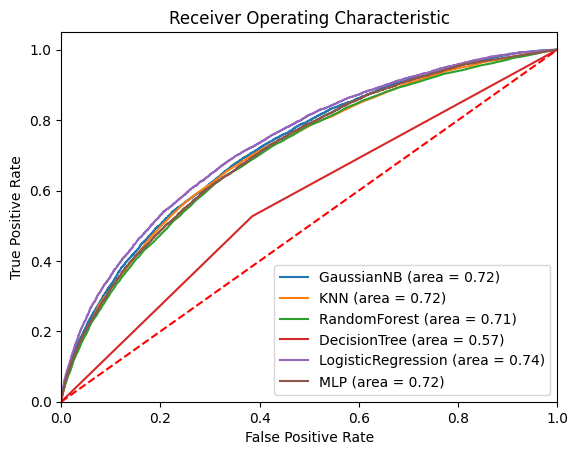

In [31]:
#auc score
from sklearn.metrics import roc_auc_score
for i in range(len(models)):
    print(models[i][0],'\t\tAccuracy: ', accuracy2[i], '\t\tAUC:', roc_auc_score(Y_test, y_pred_proba2[i][:,1]))

from sklearn.metrics import auc
# plot ROC curve
fpr2 = []
tpr2 = []
roc_auc2 = []
for i in range(len(models)):
    try:
        fpr2_, tpr2_, threshold2 = roc_curve(Y_test, y_pred_proba2[i][:,1])
        fpr2.append(fpr2_)
        tpr2.append(tpr2_)
        roc_auc2.append(auc(fpr2_, tpr2_))
        plt.plot(fpr2[i], tpr2[i], label=models[i][0] + ' (area = %0.2f)' % roc_auc2[i])
    except Exception as e:
        print("Error:", e)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
# save all models 
import joblib
# for i in range(len(models)):
#     joblib.dump(models[i][1], models[i][0] + '.joblib')
#     print(models[i][0], ' saved')


#Or save the best model   # Notes: models[name][Model()] 
# best_model = models[4][1]   #modify the index to the best model
# joblib.dump(best_model, 'best_model.joblib')

GaussianNB  saved
KNN  saved
RandomForest  saved
DecisionTree  saved
LogisticRegression  saved
MLP  saved
